Introduction to GitHUB
=======================

So far we have only used git locally, i.e. in the JupyterHUB. git was designed to be distributed, which means used on many machines, and collaborative, i.e. many people can make contributions. A common model for doing this is there is a central location where a repository is saved. Anyone can make a copy of that repository (called a clone) on their local machine. Then they can make modifications to their copy, and optionally push the changes back to the central location.

[GitHUB](https://github.com/) is one such solution. To use GitHUB you need to make an account with them. You can see my account at https://github.com/jkitchin. There you can find all the public repositories I have worked on, and you can look at the source code and version history of them.

GitHUB provides many features beyond just git. There is a feature called GitHUB actions that can automate different activities like running tests. There is also GitHUB Codespaces where you can develop software directly in your browser.

There are other sites similar to GitHUB: GitLab and Bitbucket are two common ones. All of them have a free tier, and a paid tier with more features.



In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('KElZ9uveNCs')

# Setting up a repo on GitHUB

First, go to your GitHUB account (something like https://github.com/<username>?tab=repositories). We are going to first setup a new repository.
    
Click on the green button for a new repository:
    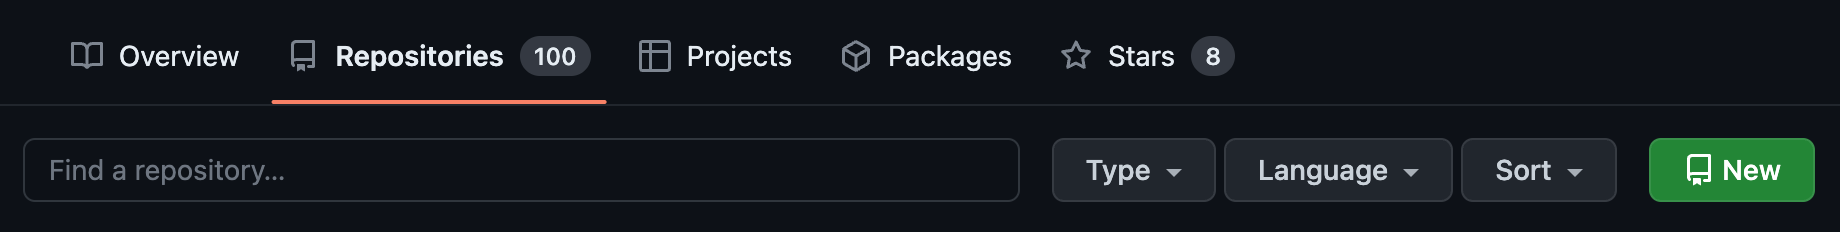
    
Give it a name, fill out the details and then select Create repository.    



## Clone the repo here in the Jupyter Hub

Use a command like this to clone your repo. You can clone this one, but you won't be able to push to it later.

    git clone https://github.com/Steel-Bank-codespaces/23-example.git
    
This will make a local copy you can work in. Go ahead and change into that directory, and make two files: setup.py, and `pkg/__init__.py`. For now they can be empty. Add these files to your git repo and commit them. 

These files are locally under version control. Now we need to get them back to GitHUB. To do that we have to setup a personal access token. See https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/creating-a-personal-access-token#creating-a-personal-access-token-classic.

Go to https://github.com/settings/tokens, and click Generate new token. We only need repo permissions, so click that box. You will have to save this token to a file, you won't be able to see it again.



Once you have a token, you can go to a terminal in the git repo, and run

    git push
    
you will be prompted for your username, and then when prompted for the password, paste in your token. You should see some output that indicates it worked. Something like this.

```
jupyter-jkitchin@andrew.cm-11dd7@jupyterhub-dev:~/src/lectures/07-github-intro/23-example$ git push
Username for 'https://github.com': jkitchin
Password for 'https://jkitchin@github.com': 
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 32 threads
Compressing objects: 100% (2/2), done.
Writing objects: 100% (4/4), 383 bytes | 383.00 KiB/s, done.
Total 4 (delta 0), reused 0 (delta 0)
To https://github.com/Steel-Bank-codespaces/23-example.git
   a360d18..8844ce0  main -> main
```   

You should also be able to see your new change at github now.

It is a little annoying to enter this information everytime, so next run this command:

    git config credential.helper store
    
You will still have to enter your username and token one more time, but after that it is stored for you and should not bother you again.



# Working with code files on GitHUB

GitHub provides two ways to edit files. Navigate to the README.md file in your repo on GitHUB. Click the pencil icon. You can edit the file right in the browser, and directly commit the changes.

Note that now, your local repo is behind in commits:

```
jupyter-jkitchin@andrew.cm-11dd7@jupyterhub-dev:~/src/lectures/07-github-intro/23-example$ git status
On branch main
Your branch is behind 'origin/main' by 1 commit, and can be fast-forwarded.
  (use "git pull" to update your local branch)

Untracked files:
  (use "git add <file>..." to include in what will be committed)
        .ipynb_checkpoints/
        pkg/.ipynb_checkpoints/
```

To get it up to date, we have to *pull* the results in. Here it is easy, there are no conflicts so we can just merge the results in.

    git pull
    
```
jupyter-jkitchin@andrew.cm-11dd7@jupyterhub-dev:~/src/lectures/07-github-intro/23-example$ git pull
Updating 09f035f..7160603
Fast-forward
 README.md | 4 +++-
 1 file changed, 3 insertions(+), 1 deletion(-)
 ```
 
 
 In browser editing is extremely convenient for small changes.



# VS Code in the browser

You can get a much fancier editor by pressing . in a code file in your repo. This will launch a Browser version of VS Code. This is a little more sophisticated and has more of a learning curve. You still have to make commits back to the repo.



# GitHUB Codespaces

An even more advanced option is to open a "CodeSpace".

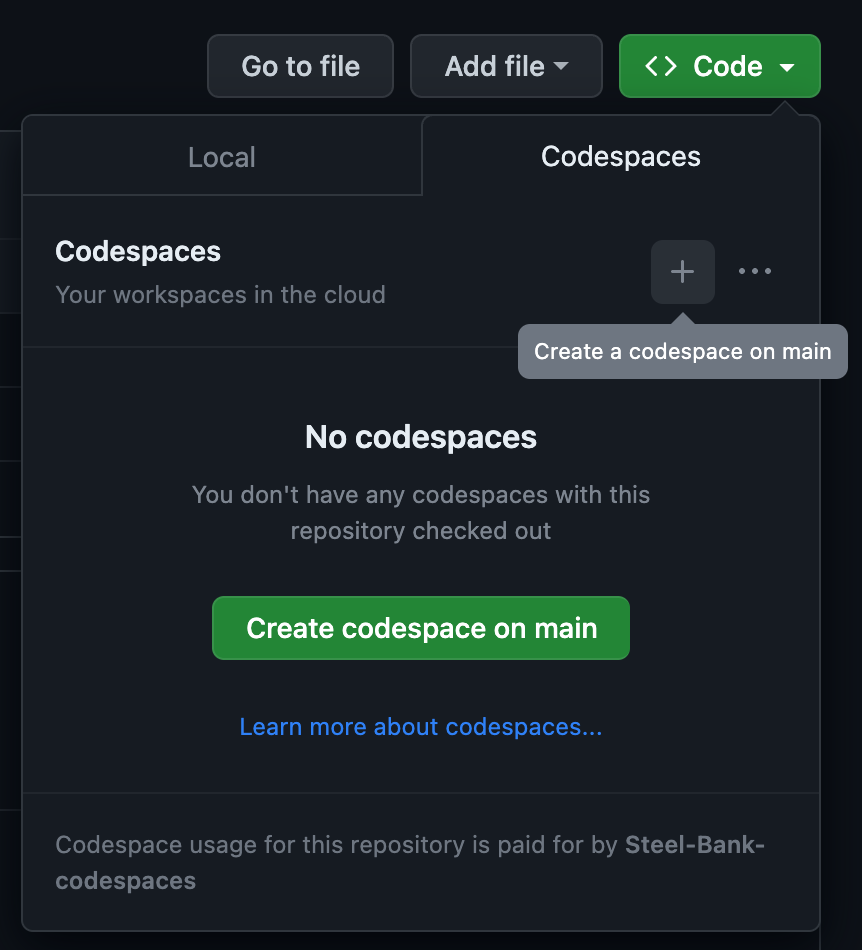

This is a full computational environment that runs in VS Code, complete with a terminal. It is like the JupyterHUB we use in class, it even can run Jupyter notebooks. It does take quite a bit of configuration to get something as functional as we have (I have already done that configuration for you). Later, you can learn more about sophisticated codespaces by studying the repos at https://github.com/Steel-Bank-codespaces. For now, we work with the base environment. 

A critical point to remember about a Codespace is that it is separate from your repo. You have to commit **and push** changes to the repo if you want to see them on GitHUB. You can even create independent Codespaces on the same repo; these do not see each other, and are like branches.

Make some new edits to the README.md file, then commit to the repo. Note this does not make it go to your repo on GitHUB. You also have to push the changes. Luckily, there are no authentication issues here, you simply run `git push`.



# Back to Jupyter Hub

Go back to your README.md file and edit it locally here. Go ahead and commit it locally.

Your local repo should be "behind" the remote repo. That means there are commits remotely that you don't have locally. If you try to push now you get an error:

```
jupyter-jkitchin@andrew.cm-11dd7@jupyterhub-dev:~/src/lectures/07-github-intro/23-example$ git push
To https://github.com/Steel-Bank-codespaces/23-example.git
 ! [rejected]        main -> main (non-fast-forward)
error: failed to push some refs to 'https://github.com/Steel-Bank-codespaces/23-example.git'
hint: Updates were rejected because the tip of your current branch is behind
hint: its remote counterpart. Integrate the remote changes (e.g.
hint: 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
```

The message tells us we have to pull the remote changes in. This will allow us to check for merge conflicts. Indeed there are some.

```
git pull
Auto-merging README.md
CONFLICT (content): Merge conflict in README.md
Automatic merge failed; fix conflicts and then commit the result.
```



## Dealing with merge conflicts

merge conflicts happen when there are conflicting changes to a line in a file. git modifies that file with syntax like this to show you the problem. Here git is unable to tell which lines to keep. You have to make that decision.

```
<<<<<<< HEAD
What about other stuff?
=======
Even with VS Code!

and in a Codespace.
>>>>>>> 62f8e56bef7eaef7dc46b8aa49a97f931a224323
```

To resolve the merge conflict you have to delete the lines you don't want, including `<<<<<<<<`, `=========` and `>>>>>>>>`. Then commit the file and then you should be able to push.

    git commit -am "fix merge"
    git push



merge conflicts with a single user are not too common, but with so many ways to edit a repo now, they are possible!



# Wrapping up thoughts on Codespaces

GitHub will provides each Free plan account 120 core hours, or 60 hours of run time for a 2 core codespace, plus 15 GB of storage to use each month.

Codespaces shut down after ~30 minutes of inactivity. After ~2 weeks of inactivity Codespaces are deleted.

They are persistent until they are deleted, which means you can restart them later and continue your work. They are intended though to be temporary development environments where you start in a clean state, do your work, commit changes, and then delete the Codespace.

You can setup almost any environment you want in a Codespace. See https://docs.github.com/en/codespaces. Doing this requires learning about Docker files and devcontainer configuration. Building the images can be slow...





# Next time

Coupling automation with GitHUB via GitHUB actions.

